In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_prices = pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_SE03_TYNDP_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
df_prices_2 = pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_SE03_endo_invest_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
df_prices_3 = pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_true_tc_SE03_endo_invest_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
df_prices_4 = pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_true_tc_SE03_TYNDP_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
df_prices_5= pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_true_tc_SE03_0_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")

#df_prices_2 =  pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_SE03_0_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
#df_prices_3 =  pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_SE03_endo_invest_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")


<Axes: >

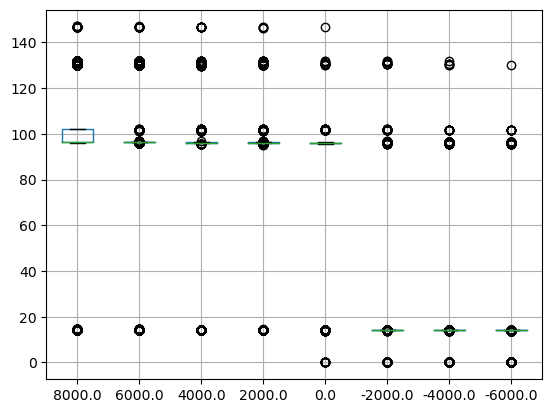

In [43]:
df_prices[filtered_columns].boxplot()

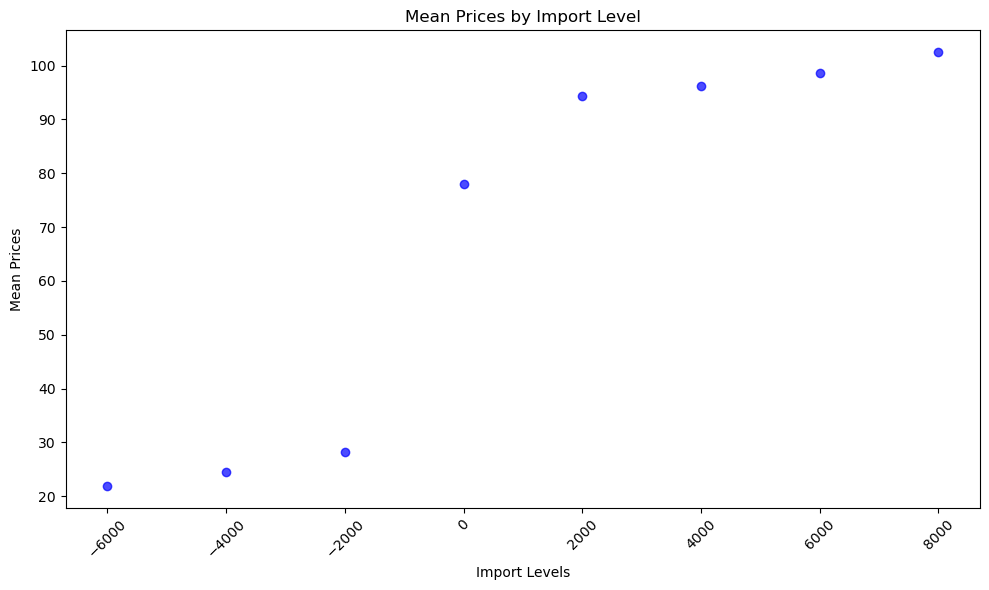

In [44]:
df_filtered = df_prices[filtered_columns]
mean_values = df_filtered.mean()


# Convert column names to float for plotting
import_levels = [float(col) for col in mean_values.index]

# Create a scatter plot for mean values
plt.figure(figsize=(10, 6))
plt.scatter(import_levels, mean_values.values, color='blue', alpha=0.7)
plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Mean Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

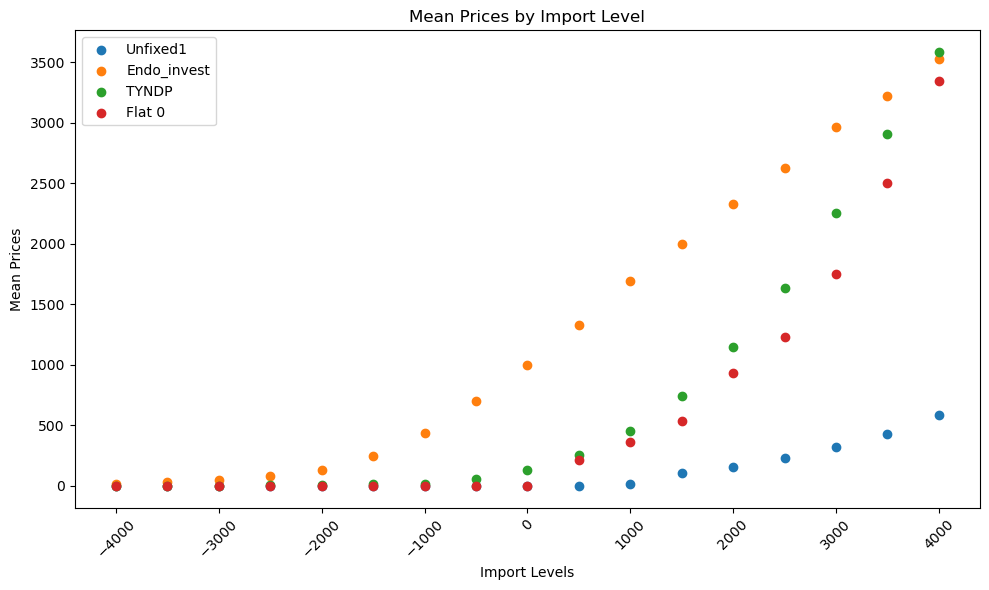

In [32]:
dfs = [df_prices,df_prices_3,df_prices_4,df_prices_5]
names = ["Unfixed1","Endo_invest", "TYNDP","Flat 0"]
plt.figure(figsize=(10, 6))

# Loop through each DataFrame and plot mean values
for i, df in enumerate(dfs):
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns = [col for col in df.columns if (float(col) % 500 == 0) & (abs(float(col)) <= 4000)]
    df_filtered = df[filtered_columns]
    
    # Calculate mean values for each import level
    mean_values = df_filtered.mean()
    
    # Convert column names to float for plotting
    import_levels = [float(col) for col in mean_values.index]
    
    # Create scatter plot for mean values
    plt.scatter(import_levels, mean_values.values, label=names[i])

plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Mean Prices')
#plt.ylim((0,1000))
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
plt.show()